In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

df = pd.read_csv("diabetic_data.csv")
diabet = df.copy()

# Data Set Description


* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission










In [4]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# **Little Preprocessing Before the Start**

-  Here we are dropping the duplicate **patient numbers**, because if model interpret
the same patient keeps coming back it can create a bias towards that motion and
that hurts the model with it's predictive power. <br>
- And now that every patient number is unique, we can drop that column with **encounter id**
- Missing values are represented by **"?"** so we need to replace by **np.nan**

In [6]:
diabet = diabet.drop_duplicates("patient_nbr", keep="first").reset_index(drop=True) 
diabet = diabet.drop(["encounter_id", "patient_nbr"], axis=1)

diabet = diabet.replace("?",np.nan)

# **Exploratory Data Analysis and Visualizations**

### **Readmitted**
This column our target feature. It is about **"days to inpatient readmission"**
* If the patient was readmitted in less than 30 days **"<30"**
* if the patient was readmitted in more than 30 days **">30"**
* If there is no record **"NO"**

We decided to reduce these values to two and map them according to the following rule;
* NO -> 0
* <30 and >30 -> 1

In [8]:
diabet = diabet.replace({"NO":0,
                         "<30":1,
                         ">30":1})

0    42985
1    28533
Name: readmitted, dtype: int64


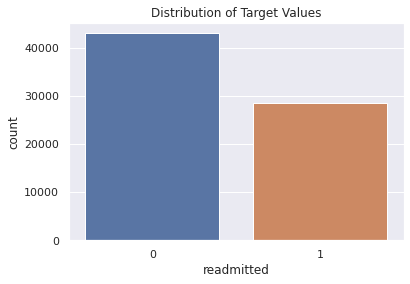

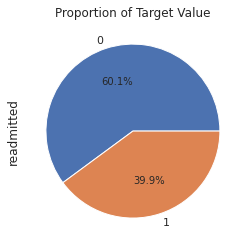

In [9]:
print(diabet.readmitted.value_counts())

sns.countplot(x = "readmitted", data = diabet)
plt.title("Distribution of Target Values")
plt.show()

# Pie chart
diabet.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

- These two diagrams show us that our target variable is almost balanced distributed.

### **Race**
We have 5 different races value, these are;
- Caucasian          
- AfricanAmerican    
- Hispanic            
- Asian
- Other 

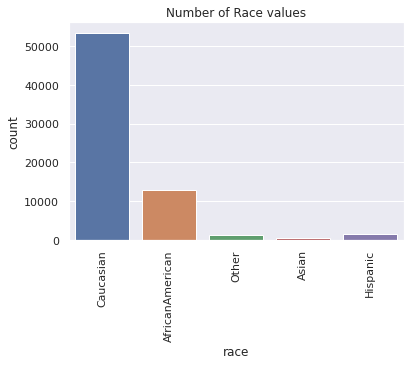

Proportion of Race
Caucasian          76.888026
AfricanAmerican    18.523789
Hispanic            2.180538
Other               1.693259
Asian               0.714388
Name: race, dtype: float64


In [11]:
sns.countplot(x=diabet.race, data = diabet)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(diabet.race.value_counts(normalize = True)*100)

- As we see, there is **Caucasians** in 76 percent of all our data. 
And other other 24 percent is divided into **African Americans**, **Hispanics**, **Asians** and **Others**.<br>
- Here we decided to divide into 3 groups like **Caucasian**, **African American** and **Other**.

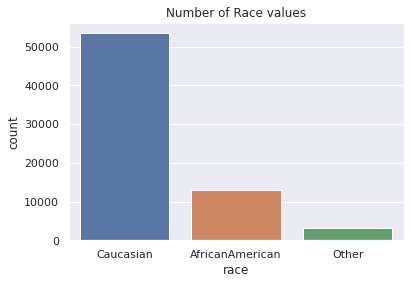

Proportion of Race After the Mapping
Caucasian          76.888026
AfricanAmerican    18.523789
Other               4.588185
Name: race, dtype: float64


In [13]:
mapped_race = {"Asian":"Other","Hispanic":"Other"}
diabet.race = diabet.race.replace(mapped_race)

sns.countplot(x="race", data = diabet)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race After the Mapping")
print(diabet.race.value_counts(normalize= True)*100)

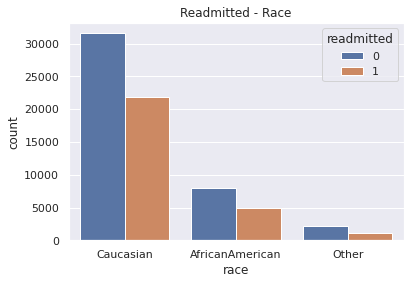

In [14]:
sns.countplot(x="race", hue= "readmitted", data = diabet)
plt.title("Readmitted - Race")
plt.show()

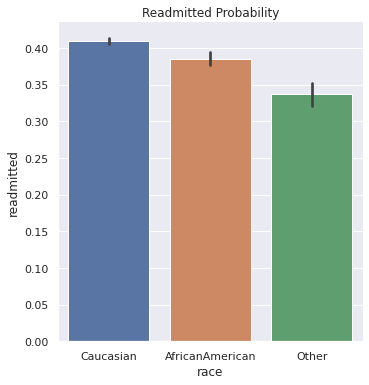

In [15]:
sns.catplot(x = "race", y = "readmitted",
            data = diabet, kind = "bar", height= 5)
plt.title("Readmitted Probability")
plt.show()

- Most of the patients are **Caucasian**, followed by **African Americans**.
- Although the **Other** values are few than **Caucasian**, 
we see that the **Readmitted Probability** almost close to **Caucasian**.

### **Gender**

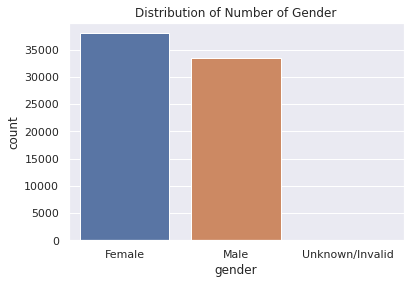

Proportions of Race Value
Female             0.531684
Male               0.468274
Unknown/Invalid    0.000042
Name: gender, dtype: float64


In [16]:
sns.countplot(x = "gender", data = diabet)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(diabet.gender.value_counts(normalize = True))

- When we looked up **Gender** values, there is only one entry for **Unknown/Invalid**. So we dropped them

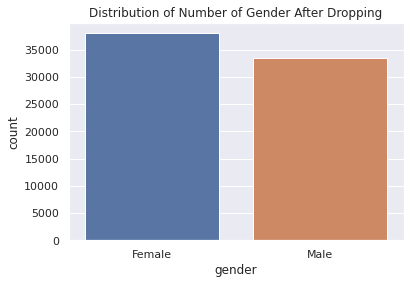

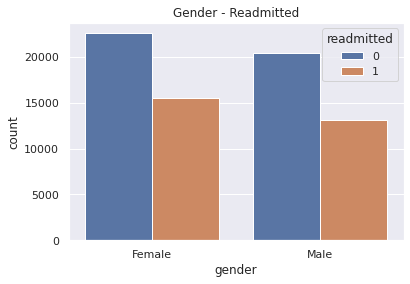

In [18]:
diabet = diabet.drop(diabet.loc[diabet["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = diabet)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = diabet)
plt.title("Gender - Readmitted")
plt.show()

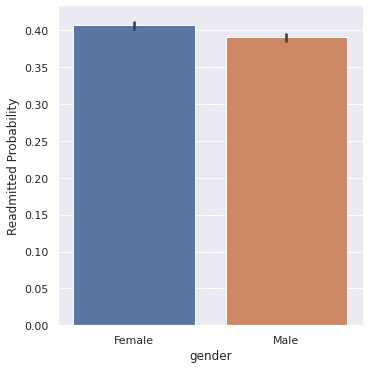

In [19]:
g = sns.catplot(x = "gender",y = "readmitted", 
                data = diabet, kind = "bar", height= 5)
g.set_ylabels("Readmitted Probability")
plt.show()

- We see a nearly equal distribution of **Gender**.
- Also, we can state that **Females** are a little more prone than **Males**.

### **Age**

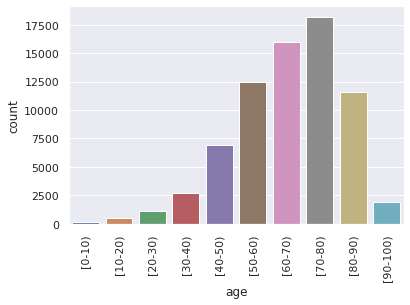

In [20]:
sns.countplot(x="age", data = diabet)
plt.xticks(rotation = 90)
plt.show()

* To get rid of this parenthesis notation and make the **Age** variable a numeric value, we changed it according to the following rule.

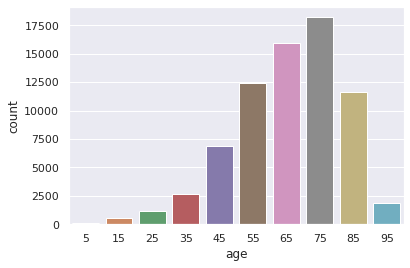

In [21]:
diabet.age = diabet.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = diabet)
#plt.xticks(rotation = 90)
plt.show()

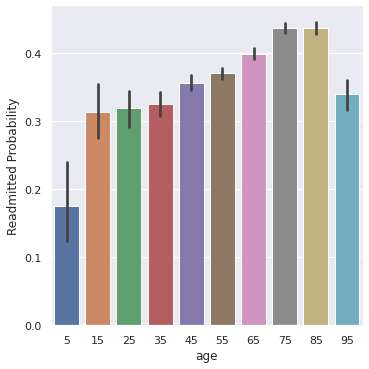

In [22]:
g = sns.catplot(x = "age", y = "readmitted", data = diabet, 
                   kind = "bar", height = 5)
g.set_ylabels("Readmitted Probability")
plt.show()

- we can understand that we have an **elderly population.**

### **Weight**

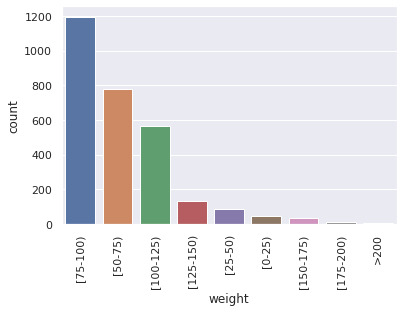

In [23]:
sns.countplot(x = "weight", data = diabet,
            order = diabet.weight.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

- As with the **age** variable, we see the same situation for **weight** and decided to managed like below.

In [24]:
diabet["weight"]=diabet["weight"].replace({"[75-100)":85,
                             "[50-75)":60,
                             "[100-125)":110,
                             "[125-150)":135,
                             "[25-50)":35,
                             "[0-25)":10,
                             "[150-175)":160,
                             "[175-200)":185,
                             ">200":205})

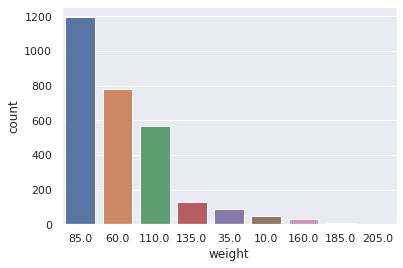

Proportions of Weights
85.0     41.885734
60.0     27.374693
110.0    19.838766
135.0     4.591658
35.0      3.119523
10.0      1.612338
160.0     1.156677
185.0     0.315457
205.0     0.105152
Name: weight, dtype: float64


In [25]:
sns.countplot(x = "weight", data = diabet,
            order = diabet.weight.value_counts().index)
plt.show()

print("Proportions of Weights")
print(diabet.weight.value_counts(normalize=True)*100)

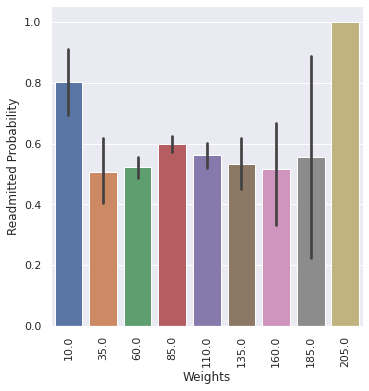

In [26]:
g = sns.catplot(x = "weight", y = "readmitted",
                kind = "bar", data = diabet, height = 5)
g.set_xticklabels(rotation = 90)
g.set_ylabels("Readmitted Probability")
g.set_xlabels("Weights")
plt.show()

### **Admission Type ID**
Integer identifier corresponding to 9 distinct values;
- **Emergency**        : 1
- **Urgent**           : 2
- **Elective**         : 3
- **Newborn**          : 4
- **Not Available**    : 5
- **NULL**             : 6
- **Trauma Center**    : 7
- **Not Mapped**       : 8



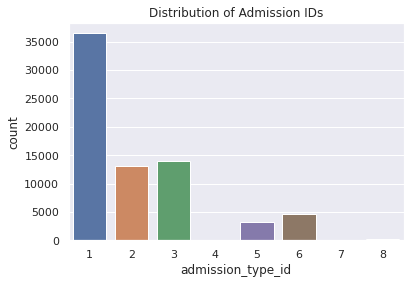

Distribution of ID's
1    36488
3    13916
2    13028
6     4588
5     3174
8      291
7       21
4        9
Name: admission_type_id, dtype: int64


In [27]:
sns.countplot(x = "admission_type_id", data = diabet)
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of ID's")
print(diabet.admission_type_id.value_counts())

In here we need to do mapping for :
- **NULL**, **Not Available** and **Not Mapped** values.
- In addition, we will map **Urgent** value as **Emergency** because they have same meaning

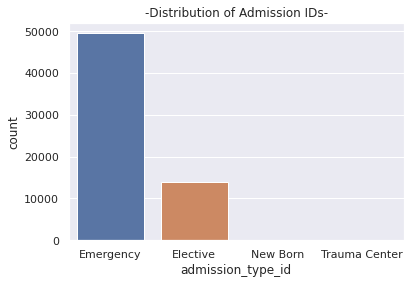

-Distribution of ID's-
Emergency        49516
Elective         13916
Trauma Center       21
New Born             9
Name: admission_type_id, dtype: int64


In [28]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

diabet.admission_type_id = diabet.admission_type_id.replace(mapped)

sns.countplot(x = "admission_type_id", data = diabet)
plt.title("-Distribution of Admission IDs-")
plt.show()

print("-Distribution of ID's-")
print(diabet.admission_type_id.value_counts())

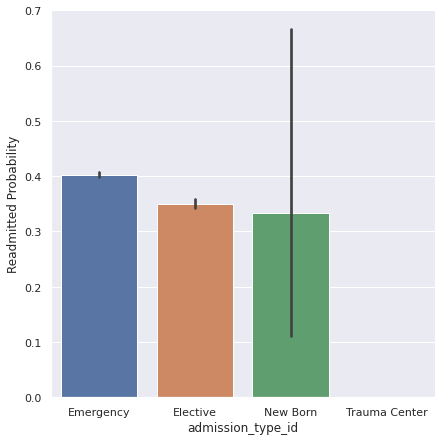

In [29]:
g = sns.catplot(x = "admission_type_id", y ="readmitted", 
                    data = diabet, height = 6, kind = "bar")
g.set_ylabels("Readmitted Probability")
plt.show()

### **Discharge Disposition ID**
-Integer identifier corresponding to 29 distinct values. For example, discharged to home, expired, and not available

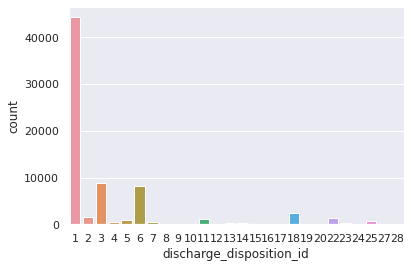

In [30]:
sns.countplot(x ="discharge_disposition_id", data = diabet)
plt.show()

When we look the graph, we can see too much values. Getting rid of that situation,
 we applied this rules: 
- If any one includes **"home"** word I will grouping into one
- If not, it will be as **OTHER**
- NAN = 18, 25, 26

In [31]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

diabet["discharge_disposition_id"] = diabet["discharge_disposition_id"].replace(mapped_discharge)

- Now it will be more clear and readable

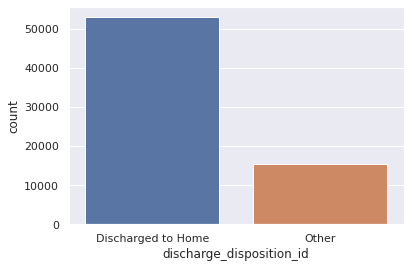

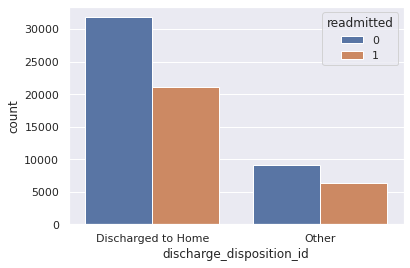

Proportions of ID's
Discharged to Home    52926
Other                 15337
Name: discharge_disposition_id, dtype: int64


In [32]:
sns.countplot(x ="discharge_disposition_id", data = diabet)
plt.show()

sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = diabet)
plt.show()

print("Proportions of ID's")
print(diabet.discharge_disposition_id.value_counts())

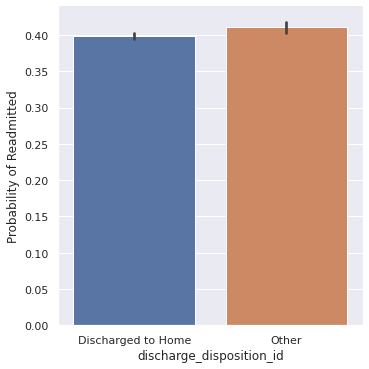

In [33]:
g = sns.catplot(x = "discharge_disposition_id", y="readmitted", 
                data = diabet, height = 5, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

### **Admission Source ID**

Integer identifier corresponding to 21 distinct values.For example, **physician referral, emergency room, and transfer from a hospital**


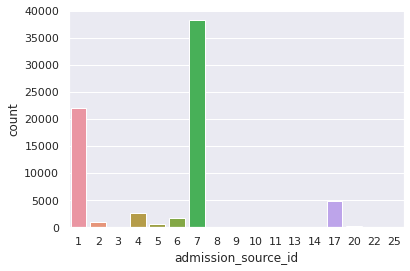

In [34]:
sns.countplot(x ="admission_source_id", data = diabet)
plt.show()

We can see that there is same problem here. Again we applied some map like:

- we'll put the similar ones together like **Referral or Transfer**
- we will replace **Null, Not Mapped, Unknown** values as NAN


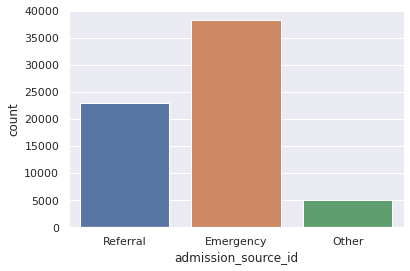

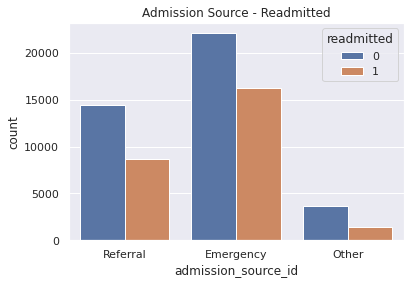

Emergency    38288
Referral     23070
Other         5053
Name: admission_source_id, dtype: int64


In [35]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
diabet.admission_source_id = diabet.admission_source_id.replace(mapped_adm)

sns.countplot(x = "admission_source_id", data = diabet)
plt.show()

sns.countplot(x = "admission_source_id", hue = "readmitted", data = diabet)
plt.title("Admission Source - Readmitted")
plt.show()


print(diabet.admission_source_id.value_counts())

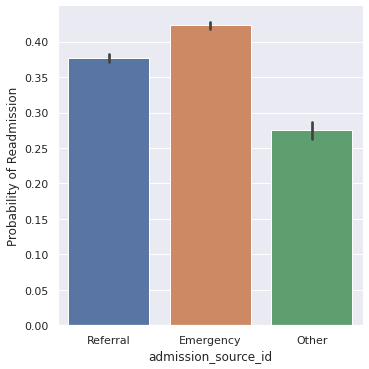

In [36]:
g = sns.catplot(x = "admission_source_id", y ="readmitted", 
                    data = diabet, kind = "bar", height= 5)
g.set_ylabels("Probability of Readmission")
plt.show()

- We see that **Readmitted Probability of Referral** is very close to **Emergency**, although **Emergency** is have more samples than other

### **Time in Hospital**
Integer number of days between admission and discharge. Shortly it is "treatment time"

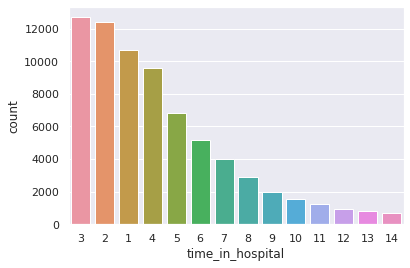

3     12701
2     12397
1     10715
4      9567
5      6839
6      5171
7      3999
8      2918
9      1990
10     1558
11     1241
12      955
13      795
14      669
Name: time_in_hospital, dtype: int64


In [37]:
sns.countplot(x="time_in_hospital", data = diabet,
              order = diabet.time_in_hospital.value_counts().index)
plt.show()

print(diabet.time_in_hospital.value_counts())


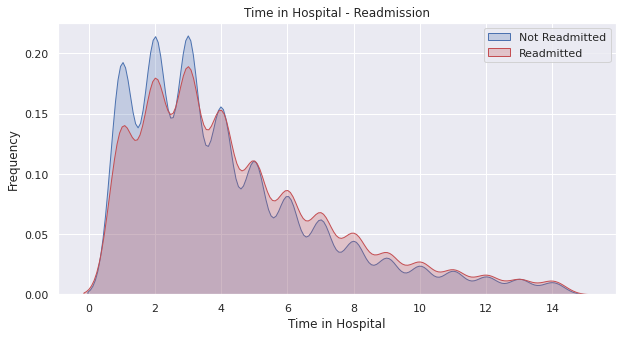

In [38]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "time_in_hospital"],
                 color = "b", shade = True, label = "Not Readmitted")

ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "time_in_hospital"],
                 color = "r", shade = True, label = "Readmitted")
ax.legend(loc="upper right")

ax.set_xlabel("Time in Hospital")
ax.set_ylabel("Frequency")
ax.set_title("Time in Hospital - Readmission")
plt.show()

- Most of people stayed 2 - 3 days in hospital


### **Payer Code**

Integer identifier corresponding to 23 distinct values, for example, **Blue Cross\Blue
Shield, Medicare, and self-pay**

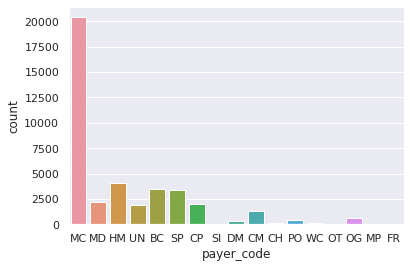

MC    20414
HM     4022
BC     3432
SP     3347
MD     2197
CP     1984
UN     1879
CM     1334
OG      658
PO      463
DM      374
WC      117
CH      117
OT       65
SI       37
MP       32
FR        1
Name: payer_code, dtype: int64


In [39]:
sns.countplot(x = "payer_code", data = diabet)
plt.show()

print(diabet.payer_code.value_counts())

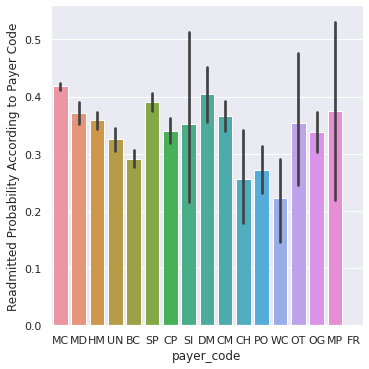

In [40]:
sns.catplot(x = "payer_code", y = "readmitted",
               data = diabet, kind = "bar", height = 5)
plt.ylabel("Readmitted Probability According to Payer Code")
plt.show()

### **Medical Specialty**
Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct
values, for example, **cardiology, internal medicine, family\general practice, and
surgeon**

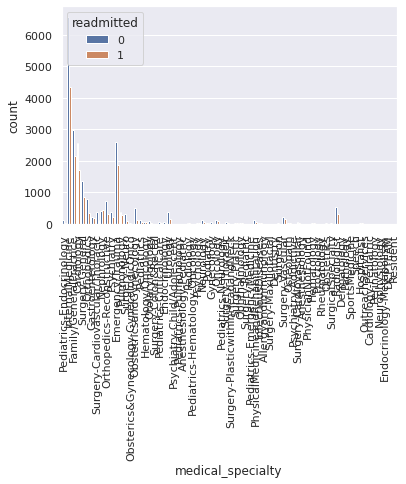

In [41]:
sns.countplot(x = "medical_specialty", hue = "readmitted",data = diabet)
plt.xticks(rotation = 90)
plt.show()

- Again, we have a lot of values. We will do grouping to get rid of this bad image, as before.

In [42]:
top_10=['InternalMedicine','Family/GeneralPractice','Cardiology','Surgery-General',
        "Nephrology","Orthopedics","Radiologist","Pulmonology"]

diabet.loc[~diabet['medical_specialty'].isin(top_10),'medical_specialty']='Other'

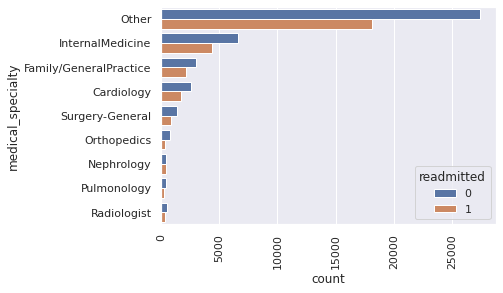

In [43]:
sns.countplot(y = "medical_specialty", hue = "readmitted",data = diabet)
plt.xticks(rotation = 90)
plt.show()

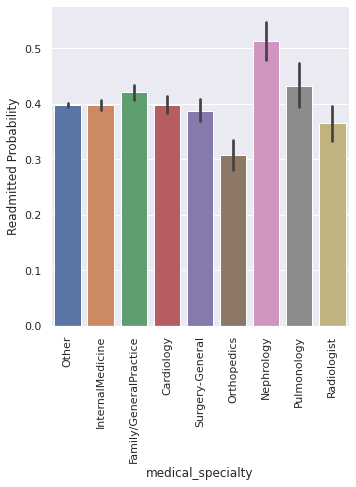

In [44]:
sns.catplot(x = "medical_specialty", y = "readmitted",
               data = diabet, kind = "bar", height = 5)
plt.ylabel("Readmitted Probability")
plt.xticks(rotation = 90)
plt.show()

- We clearlt see that the **Nephrology** section has more probability than others

### **Number of Lab Procedures**
Number of lab tests performed during the encounter

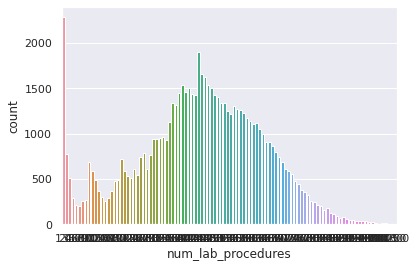

Proportions of Column
1.0      2285
43.0     1904
44.0     1661
45.0     1621
46.0     1541
         ... 
101.0       9
99.0        8
103.0       6
105.0       5
102.0       5
Name: num_lab_procedures, Length: 104, dtype: int64


In [48]:
sns.countplot(x = "num_lab_procedures", data = diabet)
plt.show()

print("Proportions of Column")
print(diabet.num_lab_procedures.value_counts())

- In there I will drop that value counts less than 10

In [50]:
lab=diabet.num_lab_procedures.value_counts()
lab_remove=lab[lab<10].index
diabet.num_lab_procedures=diabet.num_lab_procedures[~diabet.num_lab_procedures.isin(lab_remove)]

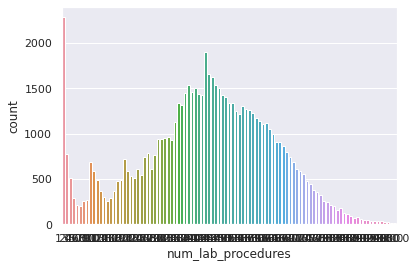

Proportions of Column
1.0      2285
43.0     1904
44.0     1661
45.0     1621
46.0     1541
         ... 
92.0       38
97.0       26
96.0       22
98.0       19
100.0      12
Name: num_lab_procedures, Length: 99, dtype: int64


In [51]:
sns.countplot(x = "num_lab_procedures", data = diabet)
plt.show()

print("Proportions of Column")
print(diabet.num_lab_procedures.value_counts())

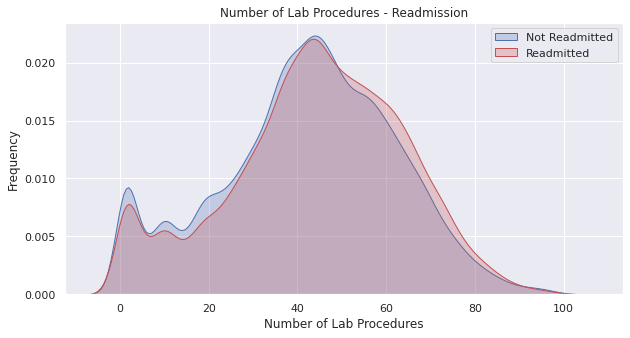

In [52]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "num_lab_procedures"],
                 color = "b", shade = True,label = "Not Readmitted")

#readmitted = 1
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "num_lab_procedures"],
                 color = "r", shade = True, label = "Readmitted")

ax.legend(loc="upper right")

ax.set_xlabel("Number of Lab Procedures")
ax.set_ylabel("Frequency")
ax.set_title("Number of Lab Procedures - Readmission")

plt.show()

### **Number of Procedures**
Number of procedures (other than lab tests) performed during the encounter

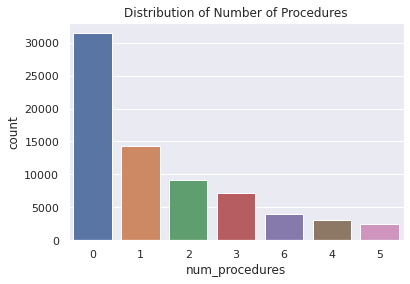

Proportions of Values
0    43.948822
1    19.998602
2    12.793120
3    10.044047
6     5.531707
4     4.273229
5     3.410473
Name: num_procedures, dtype: float64


In [53]:
sns.countplot(x = diabet.num_procedures, order = diabet.num_procedures.value_counts().index)
plt.title("Distribution of Number of Procedures")
plt.show()

print("Proportions of Values")
print(diabet.num_procedures.value_counts(normalize=True)*100)


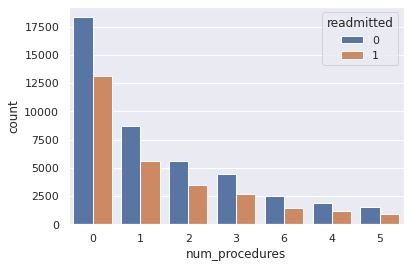

In [54]:
sns.countplot(x = "num_procedures", hue = "readmitted", 
              data = diabet, order = diabet.num_procedures.value_counts().index)
plt.show()

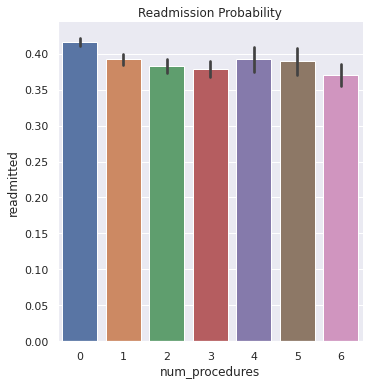

In [55]:
sns.catplot(x = "num_procedures", y = "readmitted",
               data = diabet, kind = "bar", height = 5)
plt.title("Readmission Probability")
plt.show()

### **Number of Medications**
Number of distinct generic names administered during the encounter

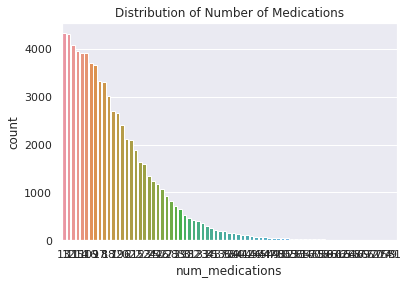

13    4332
12    4321
11    4080
15    3954
14    3915
      ... 
70       2
75       2
74       1
79       1
81       1
Name: num_medications, Length: 75, dtype: int64


In [56]:
sns.countplot(x="num_medications", data = diabet, 
        order = diabet.num_medications.value_counts().index)
plt.title("Distribution of Number of Medications")
plt.show()

print(diabet.num_medications.value_counts())

### **Diag1, Diag2 and Diag3**
- In diag section there are lots of ID that belong the specific name. So we'll map them

In [58]:
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

In [59]:
diabet = map_diagnosis(diabet,["diag_1","diag_2","diag_3"])

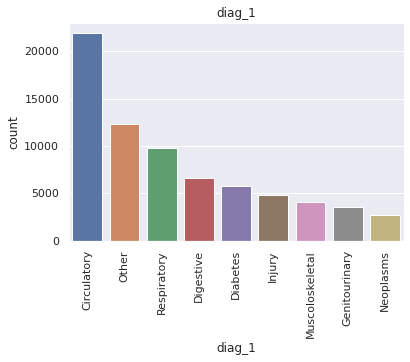

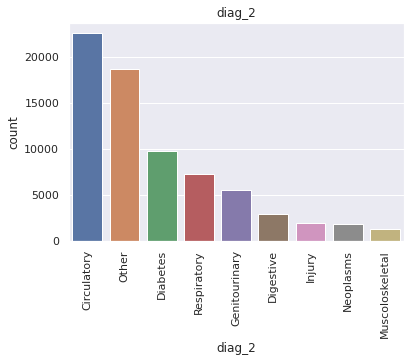

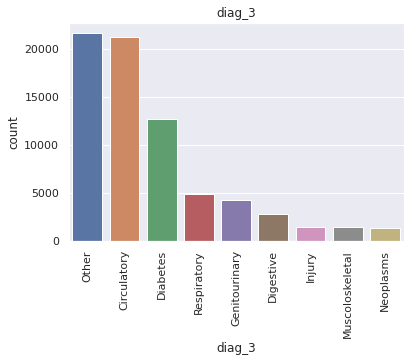

In [60]:
def plot_diags(col,data):
    sns.countplot(x = col, data = data,
            order = data[f"{col}"].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

diag_cols = ["diag_1","diag_2","diag_3"]

for diag in diag_cols:
    plot_diags(diag,diabet)


## **Diabetes medications**

- There was too many medications that belong the diabet. And some of them has just one or two value that does not any impact the model. So we decided to drop them.
- But firstly, lets look at the medications

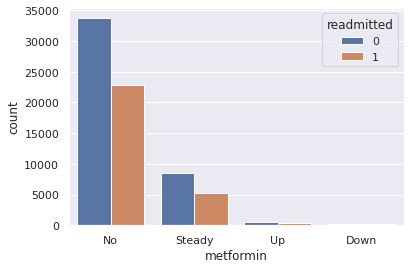

METFORMIN
No        56525
Steady    13717
Up          838
Down        435
Name: metformin, dtype: int64


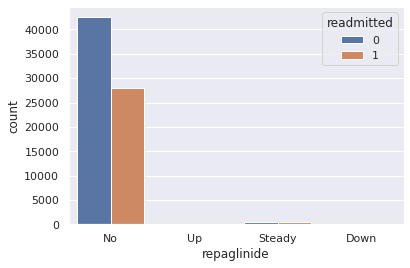

REPAGLINIDE
No        70589
Steady      824
Up           73
Down         29
Name: repaglinide, dtype: int64


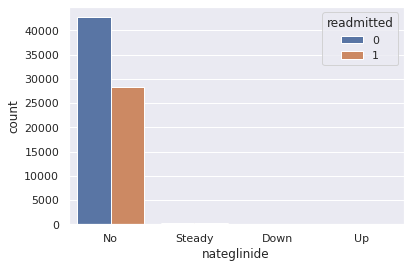

NATEGLINIDE
No        71017
Steady      474
Up           16
Down          8
Name: nateglinide, dtype: int64


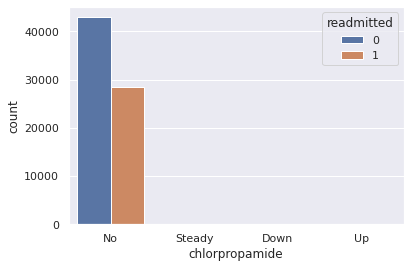

CHLORPROPAMIDE
No        71443
Steady       67
Up            4
Down          1
Name: chlorpropamide, dtype: int64


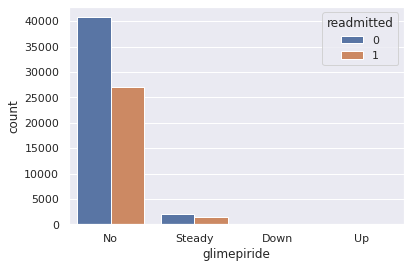

GLIMEPIRIDE
No        67770
Steady     3372
Up          235
Down        138
Name: glimepiride, dtype: int64


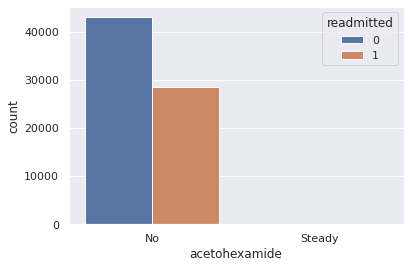

ACETOHEXAMIDE
No        71514
Steady        1
Name: acetohexamide, dtype: int64


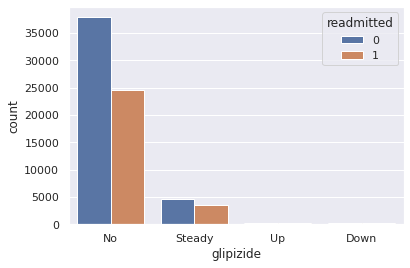

GLIPIZIDE
No        62410
Steady     8149
Up          578
Down        378
Name: glipizide, dtype: int64


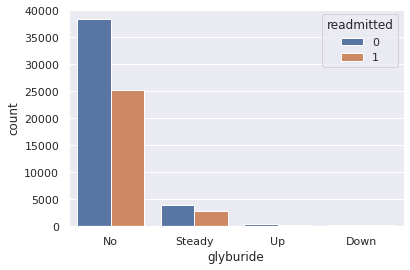

GLYBURIDE
No        63661
Steady     6812
Up          621
Down        421
Name: glyburide, dtype: int64


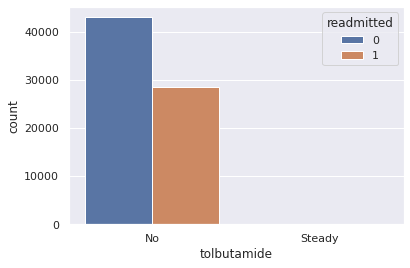

TOLBUTAMIDE
No        71496
Steady       19
Name: tolbutamide, dtype: int64


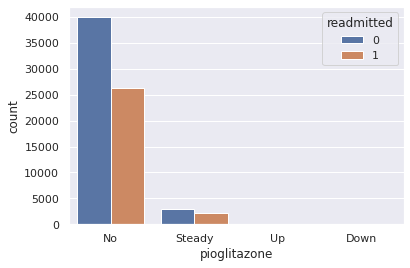

PIOGLITAZONE
No        66208
Steady     5046
Up          180
Down         81
Name: pioglitazone, dtype: int64


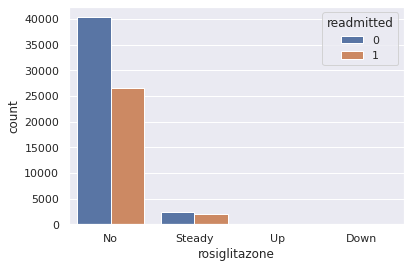

ROSIGLITAZONE
No        66815
Steady     4489
Up          136
Down         75
Name: rosiglitazone, dtype: int64


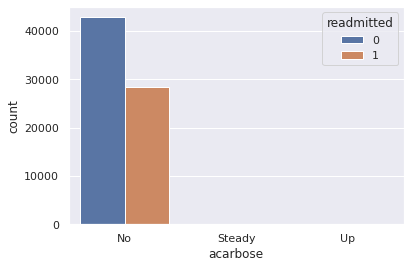

ACARBOSE
No        71313
Steady      192
Up           10
Name: acarbose, dtype: int64


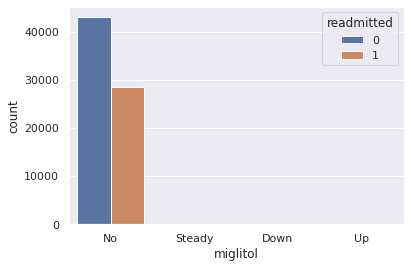

MIGLITOL
No        71495
Steady       18
Down          1
Up            1
Name: miglitol, dtype: int64


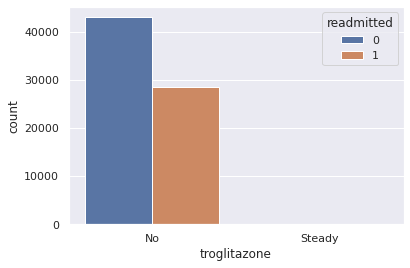

TROGLITAZONE
No        71512
Steady        3
Name: troglitazone, dtype: int64


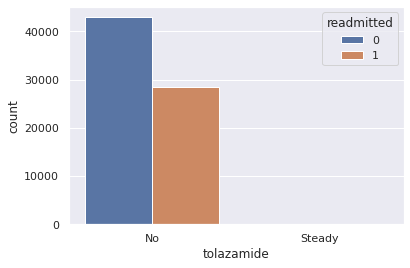

TOLAZAMIDE
No        71485
Steady       30
Name: tolazamide, dtype: int64


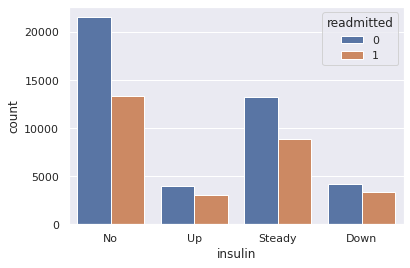

INSULIN
No        34918
Steady    22129
Down       7505
Up         6963
Name: insulin, dtype: int64


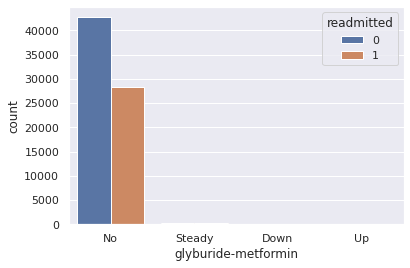

GLYBURIDE-METFORMIN
No        71013
Steady      491
Up            7
Down          4
Name: glyburide-metformin, dtype: int64


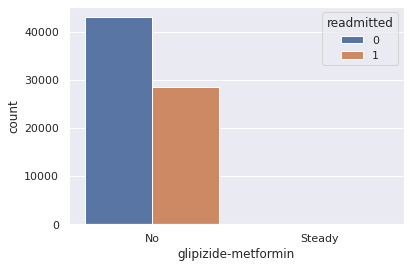

GLIPIZIDE-METFORMIN
No        71508
Steady        7
Name: glipizide-metformin, dtype: int64


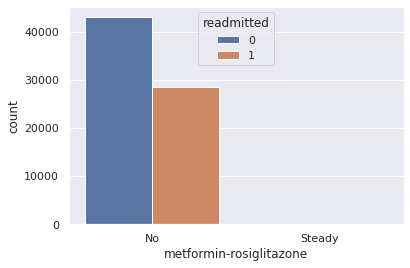

METFORMIN-ROSIGLITAZONE
No        71513
Steady        2
Name: metformin-rosiglitazone, dtype: int64


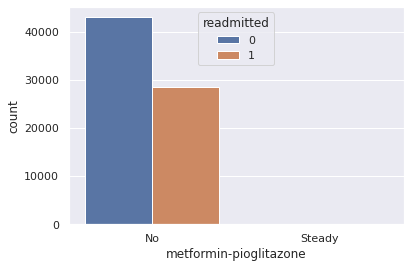

METFORMIN-PIOGLITAZONE
No        71514
Steady        1
Name: metformin-pioglitazone, dtype: int64


In [61]:
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

def explore_drug(drugs):

  for drug in drugs:
    sns.countplot(x = drug, 
                  hue = "readmitted",
                  data = diabet)
    plt.show()
    print(drug.upper())
    print(diabet[f"{drug}"].value_counts())
    

explore_drug(drug_cols)

- When we looked up the drug plots, there are some drugs that have only one value like **Steady** or **No**
- These are:<br>
    - examide 
    - citoglipton
    - glimepiride-pioglitazone

- We decided drop these values
    

In [62]:
diabet = diabet.drop(["examide","citoglipton","glimepiride-pioglitazone"], axis = "columns")

## **Change**
Indicates if there was a change in diabetic medications (either dosage or generic
name). Values: 
- **“change”** 
- **“no change”**

In [63]:
diabet.change.value_counts()

No    39493
Ch    32022
Name: change, dtype: int64

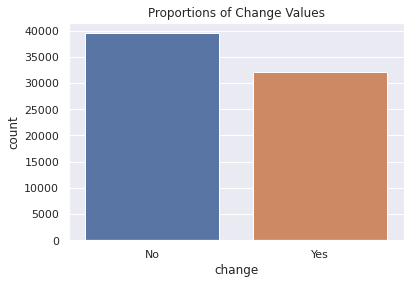

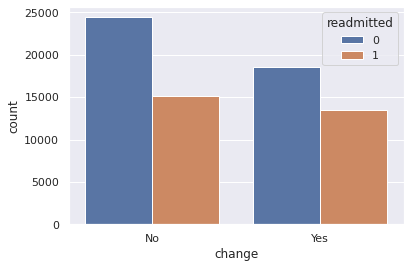

In [65]:
diabet.change = diabet.change.replace("Ch","Yes")

sns.countplot(x = "change", data = diabet)
plt.title("Proportions of Change Values")
plt.show()

sns.countplot(x = "change", hue = "readmitted", data = diabet)
plt.show()


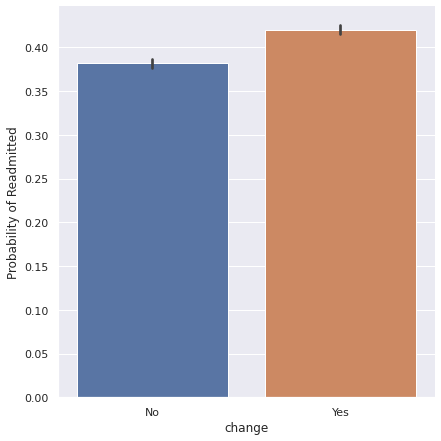

In [66]:
g = sns.catplot(x = "change", y="readmitted", data = diabet, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

## **Glucose Serum Test Result**<br>
Indicates the range of the result or if the test was not taken.<br> 
Values: 
- “>200,” 
- “>300,”
- “normal,” 
- “none” if not measured<br>

We decided use the Glucose Serum Test Result like as follows:


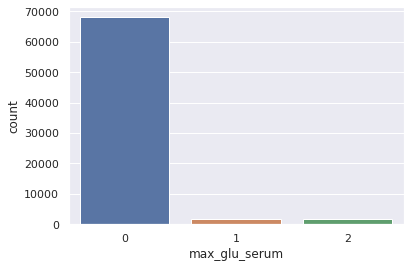

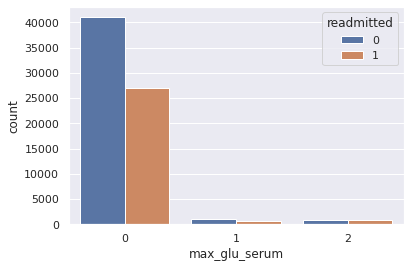

0    68059
1     1731
2     1725
Name: max_glu_serum, dtype: int64


In [67]:
diabet["max_glu_serum"] = diabet["max_glu_serum"].replace({">200":2,
                                                        ">300":2,
                                                        "Norm":1,
                                                        "None":0}) 

sns.countplot(x = "max_glu_serum", data = diabet)
plt.show()

sns.countplot(x = "max_glu_serum",hue = "readmitted", data = diabet)
plt.show()

print(diabet.max_glu_serum.value_counts())

## **A1c test result**

Indicates the range of the result or if the test was not taken. <br>
Values: 
- “>8” if the result
was greater than 8%, 
- “>7” if the result was greater than 7% but less than 8%, “normal”
- if the result was less than 7%, and “none” if not measured.

We decided use the A1c test result like as follows:

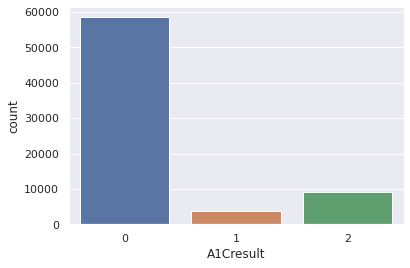

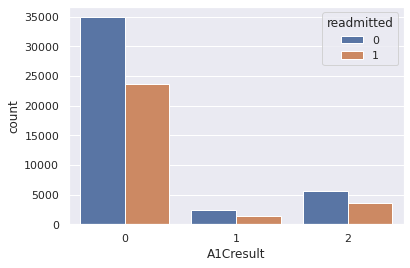

0    58529
2     9195
1     3791
Name: A1Cresult, dtype: int64


In [68]:
diabet["A1Cresult"] = diabet["A1Cresult"].replace({">7":2,
                                           ">8":2,
                                           "Norm":1,
                                           "None":0})

sns.countplot(x = "A1Cresult", data = diabet)
plt.show()

sns.countplot(x = "A1Cresult",hue = "readmitted", data = diabet)
plt.show()

print(diabet.A1Cresult.value_counts())

## **Diabetes medications**
Indicates if there was any diabetic medication prescribed. Values: **“yes”** and **“no”**

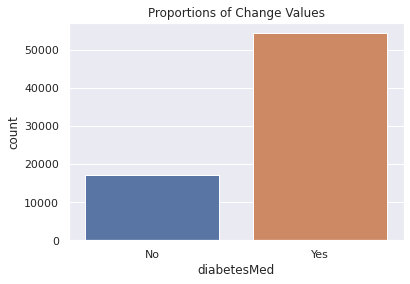

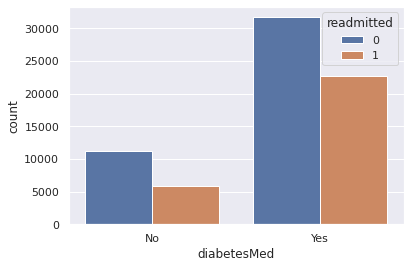

Yes    54317
No     17198
Name: diabetesMed, dtype: int64


In [69]:
sns.countplot(x = "diabetesMed", data = diabet )
plt.title("Proportions of Change Values")
plt.show()

sns.countplot(x = "diabetesMed", hue = "readmitted", data = diabet)
plt.show()

print(diabet.diabetesMed.value_counts())

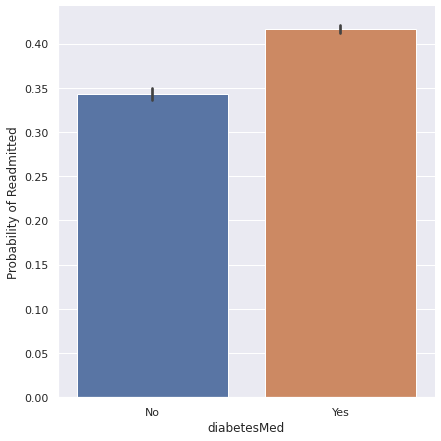

In [70]:
g = sns.catplot(x = "diabetesMed", y="readmitted", 
            data = diabet, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

# **Missing Value Analysis and Imputation**

In [71]:
def missing_val_table(data):
    """
    Takes the dataframe as Input and returns the missing values and
    percentages with respect to dataframe length.
    """
    missing_val = data.isnull().sum()
    missing_val_perc = 100 * data.isnull().sum() / len(data)
    table = pd.concat([missing_val, missing_val_perc], axis=1)
    table = table.rename(columns = {0:"Missing Values",
                                    1:"% of Total Values"})
    table = table.sort_values(by="% of Total Values",
                              ascending=False)
    return table

missing_val_table(diabet)

,Missing Values,% of Total Values
weight,68662,96.010627
payer_code,31042,43.406278
admission_type_id,8053,11.260575
admission_source_id,5104,7.136964
discharge_disposition_id,3252,4.547298
race,1946,2.721107
num_lab_procedures,57,0.079704
troglitazone,0,0.000000
glipizide,0,0.000000
glyburide,0,0.000000


- **Weight** has highest missing value such as %96, so we will drop it.
- And we will impute other features

In [74]:
diabet = diabet.drop(["weight"], axis=1)

diabet["race"] = diabet["race"].fillna(diabet["race"].mode()[0])
diabet["admission_type_id"] = diabet["admission_type_id"].fillna(diabet["admission_type_id"].mode()[0])
diabet["discharge_disposition_id"] = diabet["discharge_disposition_id"].fillna(diabet["discharge_disposition_id"].mode()[0])
diabet["admission_source_id"] = diabet["admission_source_id"].fillna(diabet["admission_source_id"].mode()[0])
diabet["num_lab_procedures"] = diabet["num_lab_procedures"].fillna(1)
diabet["payer_code"] = diabet["payer_code"].fillna(diabet["payer_code"].mode()[0])

- Lets check them

In [75]:
diabet.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

# **Some Feature Engineering**

In [ ]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [ ]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    diabet[colname] = diabet[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
diabet['numchange'] = 0

for col in keys:
    colname = str(col) + 'temp'
    diabet['numchange'] = diabet['numchange'] + diabet[colname]
    del diabet[colname]

df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]